In [42]:
library(ggplot2)
library(viridis)
library(ggbeeswarm)
library(dplyr)
library(cowplot)

In [10]:
###################################################### 
###################################################### 
###################################################### 

In [11]:
###################################################### 
#### MOFA factors as envs (up to 10)
# computed from logcounts(sce)
# no normalization

In [12]:
###################################################### 
##### all cells, all donors (no filtering)

In [69]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/"

In [70]:
list.files(mydir)

[1] "10mofa_factors_endo_eqtl"                              
 [2] "10mofa_factors_endo_eqtl_gaussE_gaussY"                
 [3] "10mofa_factors_endo_eqtl_permuteE_within_donors"       
 [4] "10mofa_factors_endo_eqtl_permuteG"                     
 [5] "10mofa_factors_endo_eqtl_permuteG_gaussE_gaussY"       
 [6] "10mofa_factors_endo_eqtl_permuteG_inXtoo_gaussE_gaussY"
 [7] "1mofa_factor_endo_eqtl"                                
 [8] "1mofa_factor_endo_eqtl_gaussE_gaussY"                  
 [9] "1mofa_factor_endo_eqtl_permuteE_within_donors"         
[10] "1mofa_factor_endo_eqtl_permuteG"                       
[11] "1mofa_factor_endo_eqtl_permuteG_gaussE_gaussY"         
[12] "2mofa_factors_endo_eqtl"                               
[13] "2mofa_factors_endo_eqtl_gaussE_gaussY"                 
[14] "2mofa_factors_endo_eqtl_permuteE_within_donors"        
[15] "2mofa_factors_endo_eqtl_permuteG"                      
[16] "2mofa_factors_endo_eqtl_permuteG_gaussE_gaussY"        
[17] "5mofa_factors_endo_eqtl"                               
[18] "5mofa_factors_endo_eqtl_gaussE_gaussY"                 
[19] "5mofa_factors_endo_eqtl_permuteE_within_donors"        
[20] "5mofa_factors_endo_eqtl_permuteG"                      
[21] "5mofa_factors_endo_eqtl_permuteG_gaussE_gaussY"

In [80]:
file = paste0(mydir,"/10mofa_factors_endo_eqtl_permuteE_within_donors/summary_endo_eqtl.csv")
# file = paste0(mydir,"/5mofa_factors_endo_eqtl_permuteE_within_donors/summary_endo_eqtl.csv")
# file = paste0(mydir,"/2mofa_factors_endo_eqtl_permuteE_within_donors/summary_endo_eqtl.csv")
# file = paste0(mydir,"/1mofa_factor_endo_eqtl_permuteE_within_donors/summary_endo_eqtl.csv")
df = read.csv(file, row.names=1)
nrow(df)
df = df[df$gene %in% chrom_22$feature,]
nrow(df)
head(df,2)

[1] 121

[1] 121

,gene,n_snps,pv_raw,snpID,pv,pv_adj
0,ENSG00000189306_RRP7A,3,0,22_42896474_T_C,0,0
1,ENSG00000189306_RRP7A,3,0,22_42897414_A_C,0,0


In [81]:
df = df[order(df$pv, df$pv_raw),]
df = df[-which(duplicated(df$gene)),]
df$qv = p.adjust(df$pv, method = "BH")

In [73]:
mofa1 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa1

[1] 88.0 44.0  0.5

In [76]:
mofa2 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa2

[1] 88.0000000 50.0000000  0.5681818

In [79]:
mofa5 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa5

[1] 88.0000000 59.0000000  0.6704545

In [82]:
mofa10 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa10

[1] 88.0000000 57.0000000  0.6477273

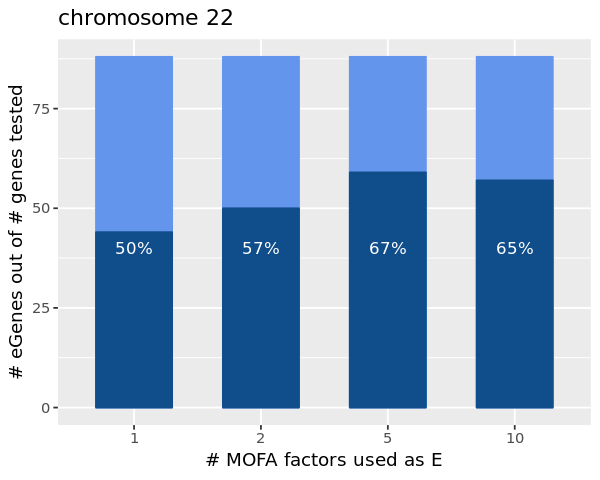

In [83]:
df = data.frame(n_MOFA = c(1,2,5,10), n_eGenes = c(mofa1[2], mofa2[2], mofa5[2], mofa10[2]), n_genes = mofa1[1])
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=40, label= paste0(round(mofa1[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=40, label= paste0(round(mofa2[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=40, label= paste0(round(mofa5[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=40, label= paste0(round(mofa10[3],digits=2)*100,"%"), size = 3.5, col = "white")

In [19]:
### calibration (permuting G from GxE only, i.e. H1)

In [86]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/"

In [89]:
prefixes = c("1mofa_factor_endo_eqtl_permuteE_within_donors",
             "2mofa_factors_endo_eqtl_permuteE_within_donors",
             "5mofa_factors_endo_eqtl_permuteE_within_donors",
            "10mofa_factors_endo_eqtl_permuteE_within_donors")

In [90]:
i = 1
plist = list()
for (prefix in prefixes){
  file0 = paste0(mydir,prefix,"/summary_endo_eqtl_all_perms.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    prefix_perm = gsub("_gaussE_gaussY","",prefix)
    file1 = paste0(mydir,"new/",prefix_perm,"_permuteE_within_donors/summary_endo_eqtl_.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "forestgreen", alpha = 0.8)
    p = p + geom_abline(slope = 1) + ylim(c(0,8))
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message in file(file, "rt"):
“cannot open file '/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/new/1mofa_factor_endo_eqtl_permuteE_within_donors_permuteE_within_donors/summary_endo_eqtl_.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


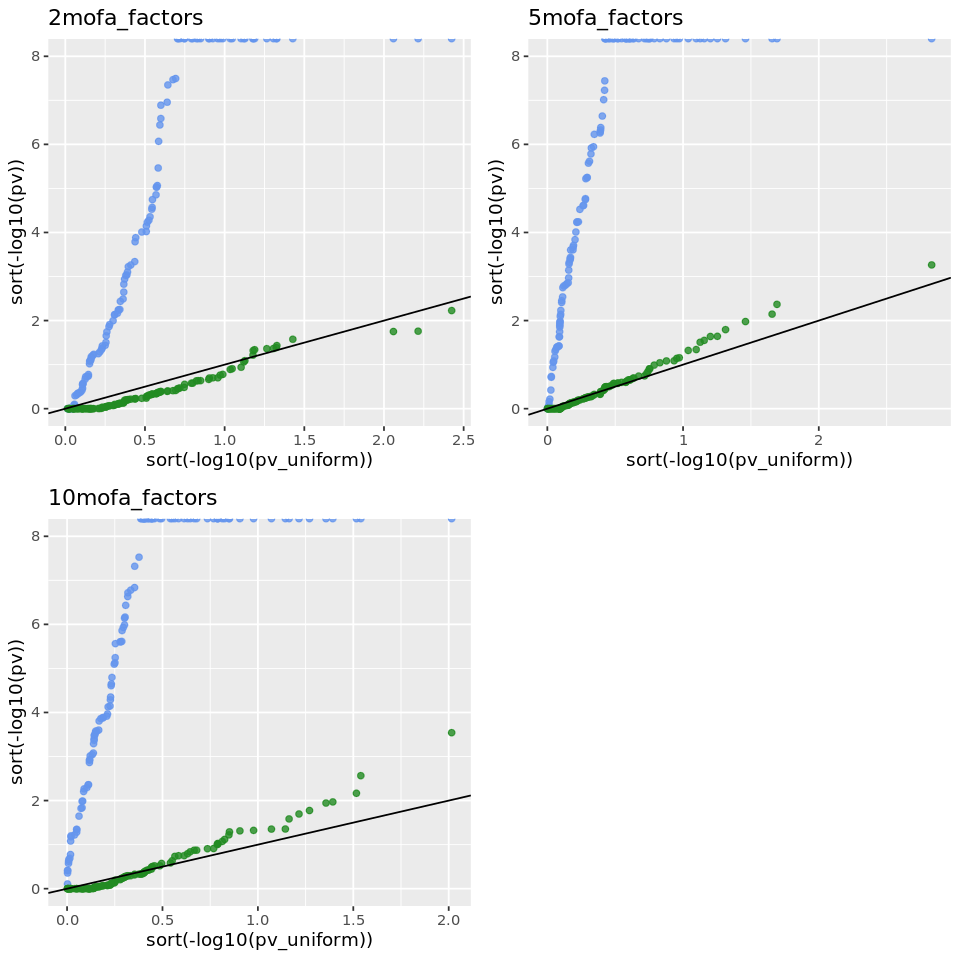

In [52]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],ncol = 2)

In [53]:
prefix = prefixes[2]
file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
df0 = read.csv(file0, row.names=1)
head(df0[order(df0$pv_adj),],2)
c(nrow(df0),
nrow(df0[df0$pv_adj < 0.1,]),
nrow(df0[df0$pv_adj < 0.1,])/nrow(df0))
head(df0[df0$pv_adj < 0.1,])

ERROR: Error in order(df0$pv_adj): argument 1 is not a vector


In [36]:
length(prefixes)

[1] 4

In [37]:
k = 1
plist = list()
labs = gsub("mofa_factor_endo_eqtl","",gsub("mofa_factors_endo_eqtl","",prefixes))
for (i in 1:(length(prefixes)-1)){
    prefix = prefixes[i]
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    for (j in (i+1):length(prefixes)){
        file1 = paste0(mydir,prefixes[j],"/summary_endo_eqtl.csv")
        df1 = read.csv(file1, row.names=1)
        df1 = df1[df1$gene %in% chrom_22$feature,] 
        df = inner_join(df0, df1,by = c("gene","snpID","n_snps"))
        p = ggplot(df, aes(x = -log10(pv.x), y = -log10(pv.y)))
        p = p + geom_point(alpha = 0.8, col = "firebrick") 
        p = p + geom_abline(slope = 1, col = "firebrick")
        plist[[k]] = p + ggtitle(paste0(labs[i]," vs ",labs[j], " MOFA, R = ", 
                                        round(cor(df$pv.x, df$pv.y), digits = 2))) 
        k = k+1
    }
} 

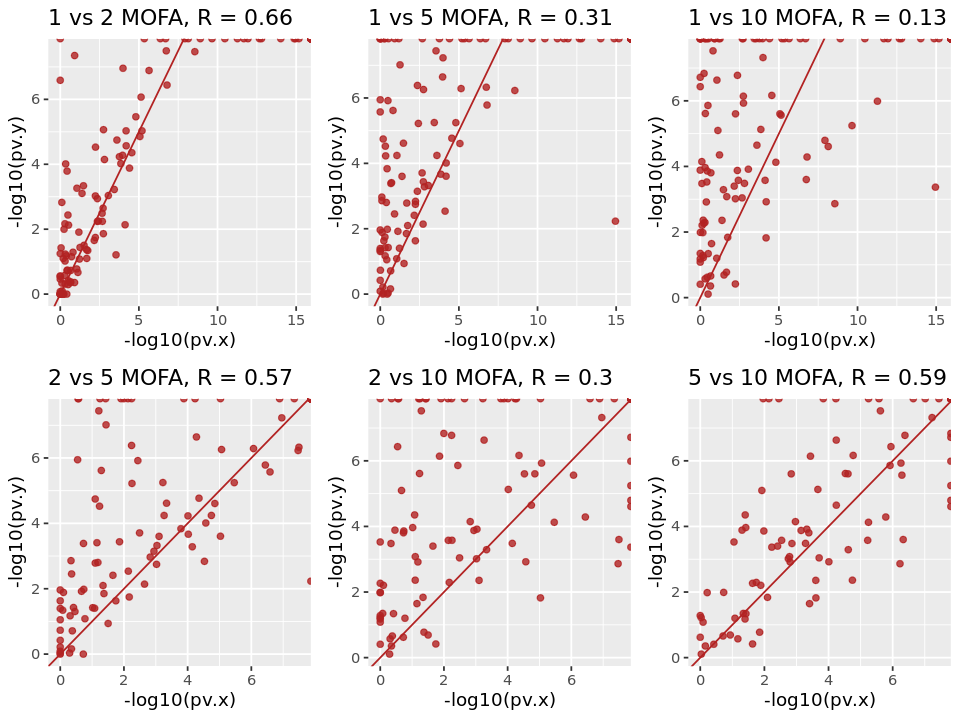

In [38]:
options(repr.plot.width = 8, repr.plot.height = 6)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],plist[[5]],plist[[6]],ncol = 3)

In [39]:
##### bootstrap (80% cells) 100 times
## 1,2,5,10 MOFA

In [127]:
prefixes = c("1mofa_factor_endo_eqtl_bootstrap","2mofa_factors_endo_eqtl_bootstrap",
             "5mofa_factors_endo_eqtl_bootstrap","10mofa_factors_endo_eqtl_bootstrap")

In [128]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names = 1)
    # 100% for comparison
    file1 = paste0(mydir,gsub("_bootstrap","",prefix),"/summary_endo_eqtl.csv")
    df1 = read.csv(file1, row.names = 1)
    df1 = df1[order(df1$pv, df1$pv_raw),]
    df1 = df1[-which(duplicated(df1$gene)),]
    df1$qv = p.adjust(df1$pv, method = "BH")
    df = inner_join(df0,df1[,c("gene","snpID","qv")])
    df_to_plot = df[df$gene %in% sampled_genes_30,]
    p = ggplot(df_to_plot, aes(x = as.factor(gsub(".*_","",gene)), y = -log10(pv+1e-10), colour = -log10(qv+1e-10))) 
    p = p + geom_violin(alpha = 0.5) + geom_boxplot(width=0.1) + geom_quasirandom(alpha = 0.4, size = 0.5) 
    p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8)) 
    p = p + scale_color_viridis(option = "D", name="-log10(q value)")
    p = p + xlab("30 randomly sampled chromsome 22 genes") + ylab("-log10(P)")
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl_bootstrap","",prefix))
    i = i+1
}

Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

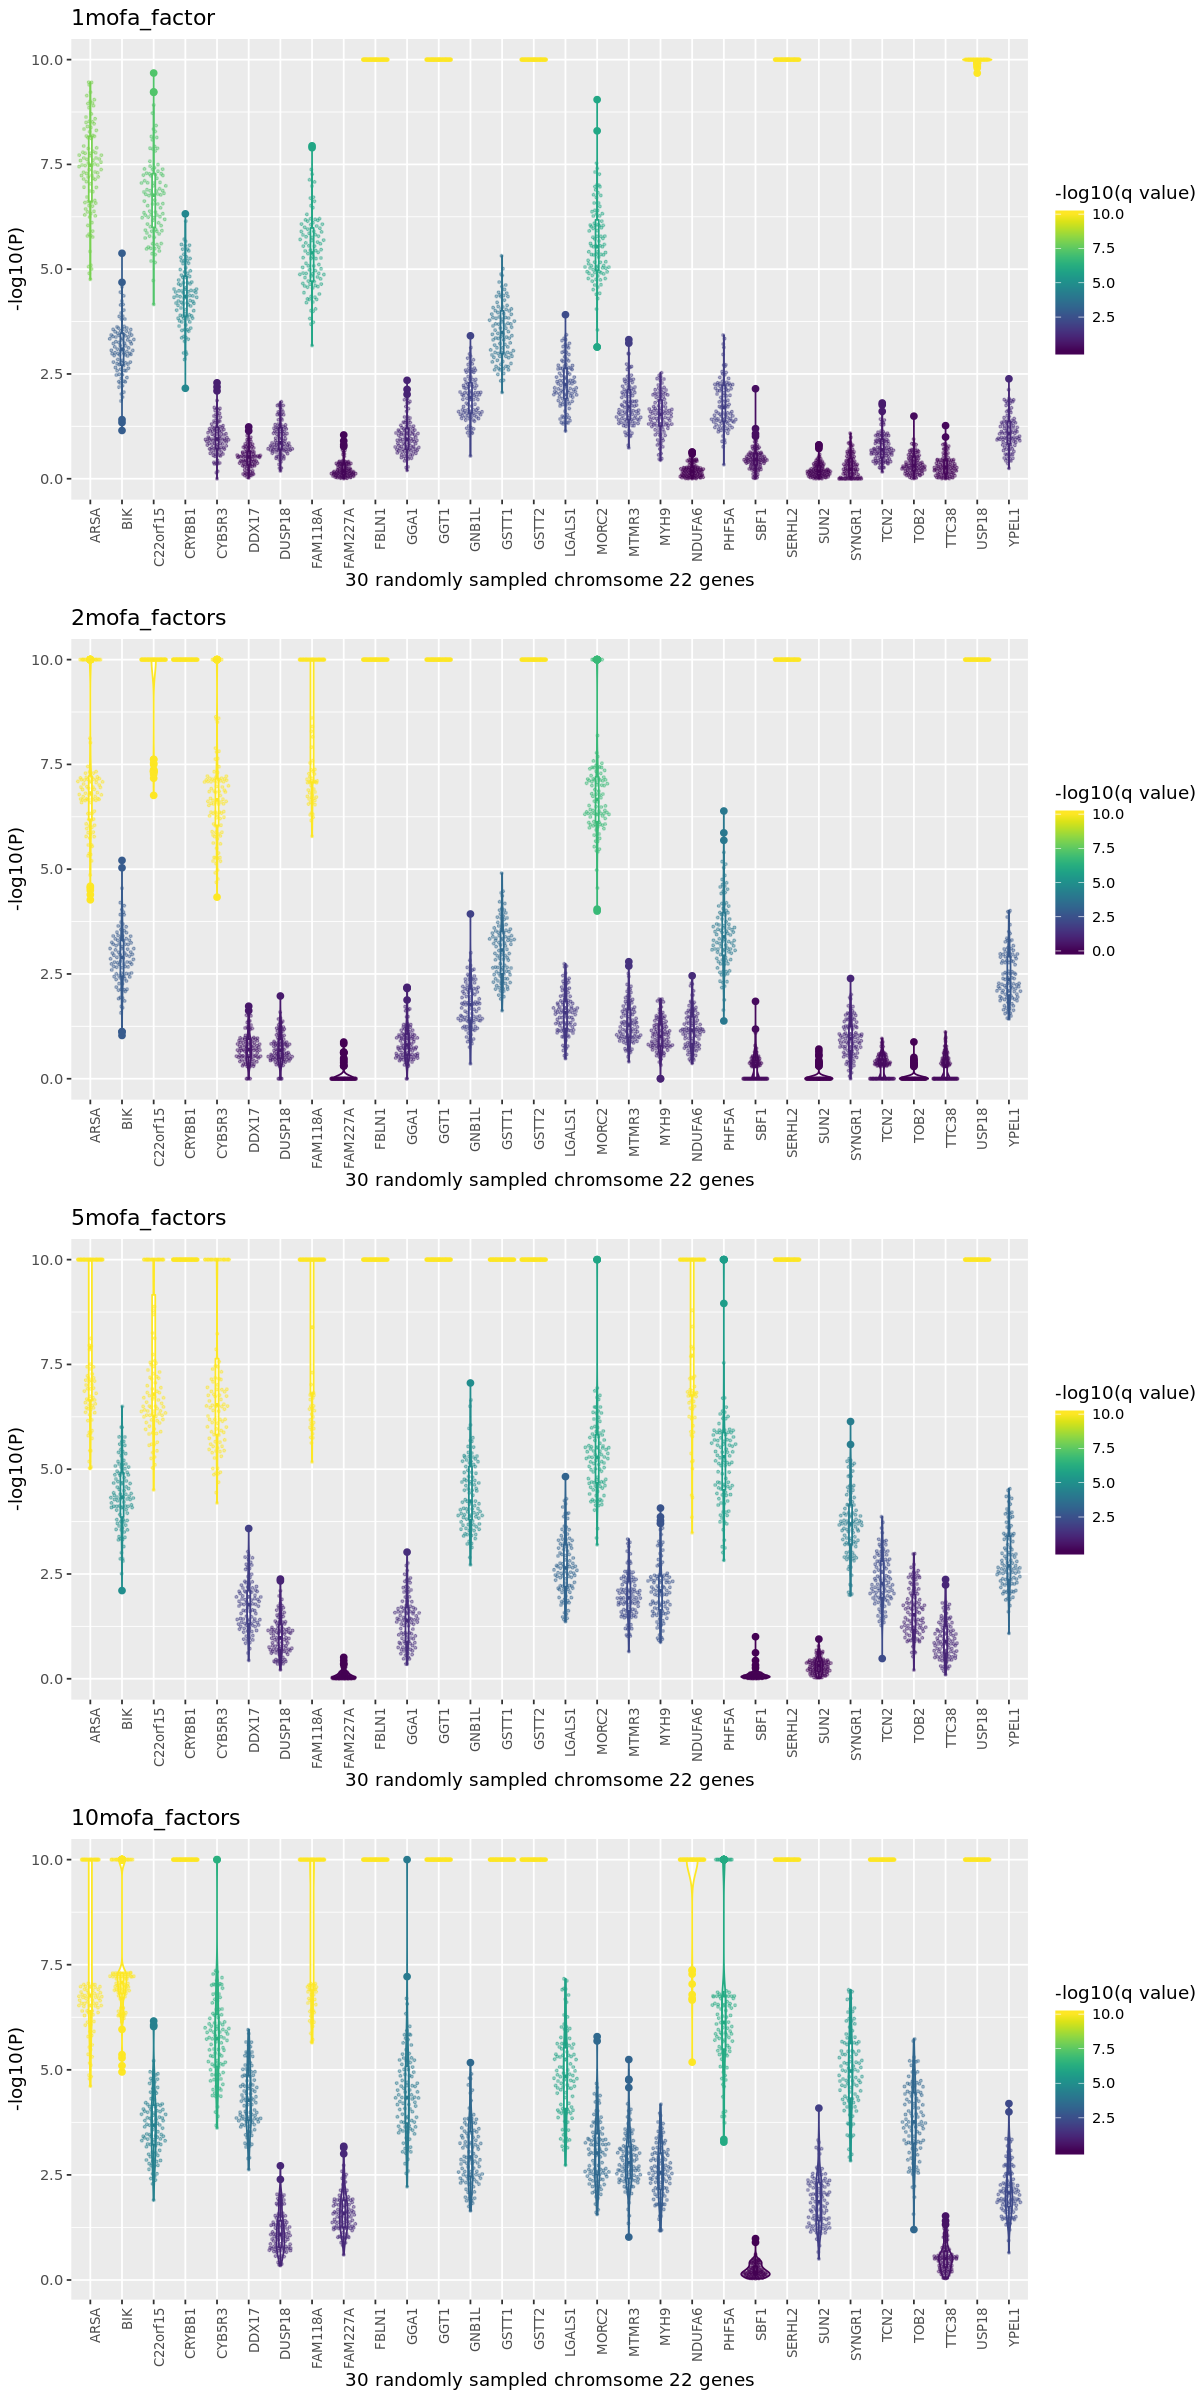

In [129]:
options(repr.plot.width = 10, repr.plot.height = 20)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 1)